In [51]:
#########################################################################################################################
# Kurs: Data science, studia zaoczne, Informatyka w Biznesie
# Data ostatniej poprawki: 04.12.2018
# Autorzy: Mariusz Czarny, Juliusz Sadowski, Anita Koszalko

# Celem projektu jest zastosowanie języka Python przy użyciu bibliotek pandas, nympy, itp., aby wykonać analizę danych.
# Danymi źródłowymi są pliki tekstowe: campaigns.txt, customers.txt, orderlines.txt, orders.txt, products.txt pobrane z
# serwera: https://drive.google.com/drive/folders/0B1A_5ELLOtW4VXgwOG1oZmhpS0k
# Ścieżka źródłowa dla plików: powinny znajdować się w tym samym katalogu co plik projektowy
# Wersja pythona: 3.6.3
# Plik dostępny jest także pod linkiem: 
# macierz korelacji
# funckja celu
# predykcja sprzedazy
# probka testowa/uczaca
# regresja liniowa/logistyczna

# User story: 
#########################################################################################################################

In [52]:
# import wewenętrznej bazy danych
import sqlite3

In [53]:
# import standardowych bibliotek
import pandas as pd
import numpy as np
import os

In [54]:
# import bibliotek służących do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [55]:
# sprawdza aktualną ścieżkę
%pwd

'C:\\Users\\Mariusz\\studia\\3 semestr\\Data science\\my project'

In [56]:
# połączenie z bazą i wykorzystanie kursora
dbConnection = sqlite3.connect("bookdb");
dbCursor = dbConnection.cursor()

In [57]:
# rozszerzenie plików zawierających dane do wczytania
txtExtention = ".txt"

In [58]:
# tablica z nazwami plików do oczytu, zawierające dane, które będą importowane do tabel bazodanowych
tables = ["Customers", "Orderlines", "Products", "Orders", "Campaigns"]

In [59]:
# wczytywanie kolejnych plików w pętli for
for table in tables:
    # ustawienie scieżki (nazwy plików pisane małymy literami)
    path = os.path.expanduser(table.lower() + txtExtention)
    # wczytywanie pliku używając delimitera tabulacji oraz kodowania 'latin1'
    file = pd.read_csv(path, delimiter="\t", encoding = 'latin1')
    # tworzy na podstawie pliku tabele i wypełnia ją rekordami, jesli istnieje zostaje nadpisana
    file.to_sql(table, dbConnection, if_exists="replace");

In [122]:
ordersSelect = '''SELECT orderid, totalprice from orders '''
orders = pd.read_sql_query(ordersSelect, dbConnection)
orders.head()

,orderid,totalprice
0,1002854,190.00
1,1002855,10.00
2,1002856,35.22
3,1002857,10.00
4,1002886,10.00


In [123]:
orderLinesSelect = '''SELECT orderid, productid, billdate from Orderlines '''
orderLines = pd.read_sql_query(orderLinesSelect, dbConnection)
orderLines.head()

,orderid,productid,billdate
0,1006414,10834,2011-03-08 00:00:00
1,1006541,11052,2011-01-20 00:00:00
2,1006542,11070,2011-01-20 00:00:00
3,1010154,11196,2009-11-20 00:00:00
4,1009110,11048,2009-11-12 00:00:00


In [124]:
productsSelect = '''SELECT productid, productgroupcode from Products '''
products = pd.read_sql_query(productsSelect, dbConnection)
products.columns = map(str.lower, products.columns)
products.head()

,productid,productgroupcode
0,10001,CA
1,10002,CA
2,10003,CA
3,10004,BK
4,10005,BK


In [132]:
orderlinesOrder = orderLines.merge(orders, on='orderid')
orderlinesOrder.head()

,orderid,productid,billdate,totalprice
0,1006414,10834,2011-03-08 00:00:00,36.00
1,1006414,10842,2011-01-20 00:00:00,36.00
2,1006541,11052,2011-01-20 00:00:00,20.00
3,1006542,11070,2011-01-20 00:00:00,19.12
4,1010154,11196,2009-11-20 00:00:00,14.95


In [159]:
orderlinesOrderProduct = orderlinesOrder.merge(products, on='productid')
orderlinesOrderProduct.head()

,orderid,productid,billdate,totalprice,productgroupcode
0,1006414,10834,2011-03-08 00:00:00,36.0,BK
1,1008588,10834,2011-03-09 00:00:00,88.0,BK
2,1010317,10834,2010-12-10 00:00:00,37.5,BK
3,1010318,10834,2010-12-10 00:00:00,80.0,BK
4,1009198,10834,2010-12-10 00:00:00,25.0,BK


In [238]:
orderlinesOrderProductClean = orderlinesOrderProduct.drop(['orderid','productid'], axis = 1)

In [239]:
orderlinesOrderProductClean["billdate"] = pd.to_datetime(orderlinesOrderProductClean["billdate"])

In [240]:
orderlinesOrderProductClean = orderlinesOrderProductClean[['billdate','productgroupcode','totalprice']]
orderlinesOrderProductClean.head()

,billdate,productgroupcode,totalprice
0,2011-03-08,BK,36.0
1,2011-03-09,BK,88.0
2,2010-12-10,BK,37.5
3,2010-12-10,BK,80.0
4,2010-12-10,BK,25.0


In [241]:
orderlinesOrderProductClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286017 entries, 0 to 286016
Data columns (total 3 columns):
billdate            286017 non-null datetime64[ns]
productgroupcode    286017 non-null object
totalprice          286017 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 18.7+ MB


In [242]:
orderlinesOrderProductClean = orderlinesOrderProductClean[(orderlinesOrderProductClean['billdate'] >= '2016-06-01') & (orderlinesOrderProductClean['billdate'] <= '2016-06-30')]

In [243]:
orderlinesOrderProductClean['billdate'] = pd.to_datetime(orderlinesOrderProductClean['billdate']).dt.day

In [245]:
orderlinesOrderProductClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4289 entries, 5187 to 285598
Data columns (total 3 columns):
billdate            4289 non-null int64
productgroupcode    4289 non-null object
totalprice          4289 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.0+ KB


In [265]:
orderlinesGrouped = orderlinesOrderProductClean.groupby(orderlinesOrderProductClean.index).agg({'billdate': 'first',
                                'productgroupcode': 'first',
                                'totalprice':sum})
orderlinesGrouped

,billdate,productgroupcode,totalprice
5187,15,AR,12.95
14386,2,AR,12.95
37024,2,BK,80.00
37025,9,BK,151.50
37026,9,BK,117.94
37027,21,BK,35.95
37028,29,BK,20.00
37029,30,BK,55.89
39292,11,AR,175.50
39293,15,AR,175.50


In [318]:
orderlinesDistinct = orderlinesGrouped.drop_duplicates(subset=['billdate','productgroupcode'],
                     inplace = True)
orderlinesDistinct = orderlinesGrouped.sort_values(by='billdate')
orderlinesDistinct

,billdate,productgroupcode,totalprice
183066,1,GA,6.95
106468,1,AR,195.00
110456,1,AP,27.94
216653,1,OT,34.95
115138,1,BK,16.00
243640,2,FR,12.95
14386,2,AR,12.95
37024,2,BK,80.00
159125,2,GA,40.85
110459,2,AP,26.95


In [319]:
orderlinesDistinct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 183066 to 249484
Data columns (total 3 columns):
billdate            159 non-null int64
productgroupcode    159 non-null object
totalprice          159 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [320]:
orderlinesDistinct = orderlinesDistinct[orderlinesDistinct['totalprice'] < orderlinesDistinct['totalprice'].mean()*2]

In [321]:
orderlinesDistinct

,billdate,productgroupcode,totalprice
183066,1,GA,6.95
110456,1,AP,27.94
216653,1,OT,34.95
115138,1,BK,16.00
243640,2,FR,12.95
14386,2,AR,12.95
37024,2,BK,80.00
159125,2,GA,40.85
110459,2,AP,26.95
219546,2,OT,42.90


In [322]:
orderlinesPivot = orderlinesDistinct.pivot('billdate','productgroupcode','totalprice')

In [323]:
orderlinesPivot.fillna(0, inplace=True)
orderlinesPivot

productgroupcode,AP,AR,BK,CA,FR,GA,OC,OT
billdate,,,,,,,,
1,27.94,0.00,16.00,0.00,0.00,6.95,0.00,34.95
2,26.95,12.95,80.00,39.84,12.95,40.85,35.01,42.90
3,12.95,54.95,0.00,11.99,18.95,19.88,18.95,15.00
4,12.95,12.95,0.00,31.83,12.95,20.89,61.85,49.95
7,12.95,109.90,21.00,11.99,18.95,19.88,0.00,71.88
8,100.85,0.00,81.00,26.95,60.95,77.58,34.95,104.68
9,14.95,54.95,0.00,24.95,25.95,19.90,18.95,107.75
10,26.95,54.95,14.35,0.00,54.85,17.95,38.90,62.86
11,47.90,0.00,14.00,63.70,46.70,23.90,46.70,39.89


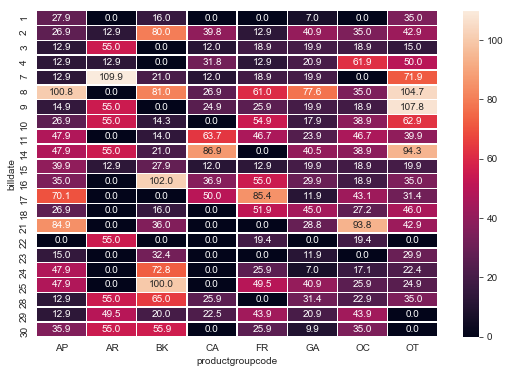

In [329]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(orderlinesPivot, annot=True, fmt=".01f", linewidths=.5, ax=ax)

In [63]:
ordersCustomer = orders.merge(customers, on='customerid')

In [64]:
ordersCustomer.head()

,totalprice,numunits,campaignid,customerid,orderid,gender
0,190.00,3,2141,45978,1002854,M
1,10.00,1,2173,125381,1002855,M
2,35.22,2,2141,103122,1002856,None
3,10.00,1,2173,130980,1002857,F
4,10.00,1,2141,48553,1002886,None


In [65]:
selectCampaigns = '''SELECT discount, campaignid from campaigns '''
campaignsDF = pd.read_sql_query(selectCampaigns, dbConnection)
campaignsDF.sort_values(by=["discount"], ascending=0).head(100)

,discount,campaignid
97,50,2098
96,50,2097
65,50,2066
72,50,2073
22,50,2023
187,50,2188
21,45,2022
184,40,2185
37,32,2038
94,30,2095


In [66]:
ordersCustomerAndCampaigns = ordersCustomer.merge(campaignsDF, on='campaignid')
ordersCustomerAndCampaigns.head()

,totalprice,numunits,campaignid,customerid,orderid,gender,discount
0,190.00,3,2141,45978,1002854,M,10
1,35.22,2,2141,103122,1002856,None,10
2,10.00,1,2141,48553,1002886,None,10
3,10.00,1,2141,130970,1003044,F,10
4,17.50,1,2141,21927,1003046,F,10


In [67]:
orderLinesSelect = '''SELECT orderlineid, orderid, productid, billdate from Orderlines '''
orderLines = pd.read_sql_query(orderLinesSelect, dbConnection)

In [68]:
orderLines.head()

,orderlineid,orderid,productid,billdate
0,1010561,1006414,10834,2011-03-08 00:00:00
1,1010562,1006541,11052,2011-01-20 00:00:00
2,1010563,1006542,11070,2011-01-20 00:00:00
3,1010564,1010154,11196,2009-11-20 00:00:00
4,1010565,1009110,11048,2009-11-12 00:00:00


In [79]:
orderlinesOrderCustomerCampaign = orderLines.merge(ordersCustomerAndCampaigns, on='orderid')

In [81]:
totalpriceByDate = orderlinesOrderCustomerCampaign.drop(['orderlineid', 'orderid', 'numunits', 'campaignid', 'customerid', 'gender', 'discount'], axis = 1)
totalpriceByDate.head(20)

,productid,billdate,totalprice
0,10834,2011-03-08 00:00:00,36.00
1,10842,2011-01-20 00:00:00,36.00
2,11052,2011-01-20 00:00:00,20.00
3,11070,2011-01-20 00:00:00,19.12
4,11196,2009-11-20 00:00:00,14.95
5,11048,2009-11-12 00:00:00,49.90
6,11196,2009-11-20 00:00:00,49.90
7,10816,2009-11-04 00:00:00,175.00
8,11048,2009-11-11 00:00:00,10.00
9,11196,2009-11-20 00:00:00,14.95


In [77]:
totalpriceByDate = orderlinesOrderCustomerCampaign.drop(['orderlineid', 'orderid', 'numunits', 'campaignid', 'customerid', 'gender', 'discount'], axis = 1)

In [78]:
totalpriceByDate.head()

,billdate,totalprice
0,2011-03-08 00:00:00,36.00
1,2011-01-20 00:00:00,36.00
2,2011-01-20 00:00:00,20.00
3,2011-01-20 00:00:00,19.12
4,2009-11-20 00:00:00,14.95


In [71]:
orderlinesOrderCustomerCampaign["year"] = pd.to_datetime(orderlinesOrderCustomerCampaign["billdate"]).dt.year
orderlinesOrderCustomerCampaign.head()

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount,year
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10,2011
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10,2011
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10,2011
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10,2011
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0,2009


In [72]:
orderlinesOrderCustomerCampaign["month"] = pd.to_datetime(orderlinesOrderCustomerCampaign["billdate"]).dt.month
orderlinesOrderCustomerCampaign.head()

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount,year,month
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10,2011,3
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10,2011,1
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10,2011,1
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10,2011,1
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0,2009,11


In [73]:
orderlinesOrderCustomerCampaign["month"] = pd.to_datetime(orderlinesOrderCustomerCampaign['billdate']).dt.strftime('%b')
orderlinesOrderCustomerCampaign.head()

,orderlineid,orderid,productid,billdate,totalprice,numunits,campaignid,customerid,gender,discount,year,month
0,1010561,1006414,10834,2011-03-08 00:00:00,36.00,2,2141,48167,M,10,2011,Mar
1,1010560,1006414,10842,2011-01-20 00:00:00,36.00,2,2141,48167,M,10,2011,Jan
2,1010562,1006541,11052,2011-01-20 00:00:00,20.00,2,2141,15824,M,10,2011,Jan
3,1010563,1006542,11070,2011-01-20 00:00:00,19.12,1,2141,124842,M,10,2011,Jan
4,1010564,1010154,11196,2009-11-20 00:00:00,14.95,1,2173,49720,M,0,2009,Nov


In [50]:
totalpriceByDate = orderlinesOrderCustomerCampaign.drop(['orderlineid', 'orderid', 'productid', 'numunits', 'campaignid', 'customerid', 'gender', 'discount'], axis = 1)

KeyError: "['orderlineid' 'orderid' 'productid' 'campaignid'] not found in axis"

In [25]:
flights_long = sns.load_dataset("flights")
flights_long.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [26]:
flights_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [27]:
totalpriceByDate['totalprice']  = totalpriceByDate.totalprice.astype(int)
totalpriceByDate['year']  = totalpriceByDate.year.astype(str)
totalpriceByDate.head()

,totalprice,year,month
0,36,2011,Mar
1,36,2011,Jan
2,20,2011,Jan
3,19,2011,Jan
4,14,2009,Nov


In [28]:
totalpriceByDate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280853 entries, 0 to 280852
Data columns (total 3 columns):
totalprice    280853 non-null int32
year          280853 non-null object
month         280853 non-null object
dtypes: int32(1), object(2)
memory usage: 7.5+ MB


In [29]:
totalpriceByDate = totalpriceByDate[['year','month','totalprice']]
totalpriceByDate.head()

,year,month,totalprice
0,2011,Mar,36
1,2011,Jan,36
2,2011,Jan,20
3,2011,Jan,19
4,2009,Nov,14


In [44]:
import pandas.util.testing as tm; tm.N = 3

#Create a unpivoted function
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])

#Set the DataFrame we'll be using
dframe = unpivot(tm.makeTimeDataFrame())

In [46]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
date        12 non-null datetime64[ns]
variable    12 non-null object
value       12 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 368.0+ bytes


In [42]:
matrix = totalpriceByDate.pivot('year','month','totalprice')
matrix

ValueError: Index contains duplicate entries, cannot reshape

In [31]:
orderlinesOrderCustomerCampaign = orderlinesOrderCustomerCampaign.drop(columns=["orderlineid", "orderid", "productid", "campaignid"])

In [32]:
orderlinesOrderCustomerCampaign.head(20)

,billdate,totalprice,numunits,customerid,gender,discount,year,month
0,2011-03-08 00:00:00,36.00,2,48167,M,10,2011,Mar
1,2011-01-20 00:00:00,36.00,2,48167,M,10,2011,Jan
2,2011-01-20 00:00:00,20.00,2,15824,M,10,2011,Jan
3,2011-01-20 00:00:00,19.12,1,124842,M,10,2011,Jan
4,2009-11-20 00:00:00,14.95,1,49720,M,0,2009,Nov
5,2009-11-12 00:00:00,49.90,4,102019,F,10,2009,Nov
6,2009-11-20 00:00:00,49.90,4,102019,F,10,2009,Nov
7,2009-11-04 00:00:00,175.00,1,119644,F,10,2009,Nov
8,2009-11-11 00:00:00,10.00,1,105604,M,0,2009,Nov
9,2009-11-20 00:00:00,14.95,1,108223,F,0,2009,Nov


In [33]:
sex = pd.get_dummies(orderlinesOrderCustomerCampaign["gender"])
orderlinesOrderCustomerCampaign["gender"] = sex

In [34]:
orderlinesOrderCustomerCampaign.head(20)

,billdate,totalprice,numunits,customerid,gender,discount,year,month
0,2011-03-08 00:00:00,36.00,2,48167,0,10,2011,Mar
1,2011-01-20 00:00:00,36.00,2,48167,0,10,2011,Jan
2,2011-01-20 00:00:00,20.00,2,15824,0,10,2011,Jan
3,2011-01-20 00:00:00,19.12,1,124842,0,10,2011,Jan
4,2009-11-20 00:00:00,14.95,1,49720,0,0,2009,Nov
5,2009-11-12 00:00:00,49.90,4,102019,1,10,2009,Nov
6,2009-11-20 00:00:00,49.90,4,102019,1,10,2009,Nov
7,2009-11-04 00:00:00,175.00,1,119644,1,10,2009,Nov
8,2009-11-11 00:00:00,10.00,1,105604,0,0,2009,Nov
9,2009-11-20 00:00:00,14.95,1,108223,1,0,2009,Nov


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

model = LinearRegression(fit_intercept=True)
model = GaussianNB()

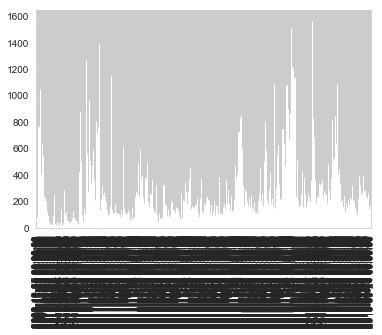

In [36]:
barGraph = orderlinesOrderCustomerCampaign
(barGraph.billdate).value_counts().sort_index().plot(kind='bar')

In [37]:
groupedByCustomerTemp = orderlinesOrderCustomerCampaign.groupby(['customerid', 'billdate']).size()
groupedByCustomer = groupedByCustomerTemp.unstack()
groupedByCustomer = groupedByCustomer.fillna(0)
groupedByCustomer.head(50)

billdate,2009-10-23 00:00:00,2009-10-24 00:00:00,2009-10-27 00:00:00,2009-10-28 00:00:00,2009-10-29 00:00:00,2009-10-30 00:00:00,2009-11-03 00:00:00,2009-11-04 00:00:00,2009-11-05 00:00:00,2009-11-06 00:00:00,...,2016-09-08 00:00:00,2016-09-09 00:00:00,2016-09-10 00:00:00,2016-09-13 00:00:00,2016-09-14 00:00:00,2016-09-15 00:00:00,2016-09-16 00:00:00,2016-09-17 00:00:00,2016-09-20 00:00:00,2016-09-21 00:00:00
customerid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
type(groupedByCustomerTemp)
groupedByCustomerTemp

customerid  billdate           
1           2012-03-14 00:00:00    1
2           2011-03-09 00:00:00    1
3           2014-05-03 00:00:00    1
4           2010-12-30 00:00:00    1
5           2011-02-16 00:00:00    1
6           2010-09-04 00:00:00    1
7           2014-12-14 00:00:00    3
8           2014-10-16 00:00:00    4
9           2010-11-25 00:00:00    1
10          2015-11-11 00:00:00    2
            2015-11-19 00:00:00    1
11          2014-07-29 00:00:00    1
12          2012-04-18 00:00:00    1
13          2011-05-24 00:00:00    1
14          2011-01-28 00:00:00    1
15          2014-05-29 00:00:00    1
16          2015-08-31 00:00:00    2
17          2015-03-19 00:00:00    1
18          2016-01-21 00:00:00    1
19          2011-12-01 00:00:00    1
            2011-12-19 00:00:00    1
20          2011-08-29 00:00:00    1
21          2011-12-28 00:00:00    1
22          2009-11-12 00:00:00    1
            2009-11-21 00:00:00    1
23          2016-02-24 00:00:00    1
24    

In [39]:
vectorBy2016 = groupedByCustomer.loc[:,2016]
vectorBy2016.head(50)

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2016] of <class 'int'>

In [ ]:
matrix = groupedByCustomer.loc[:,[2009,2010,2011,2012,2014,2015]]

In [ ]:
pct_missing = round((orderlinesOrderCustomerCampaign.isnull().sum())/(orderlinesOrderCustomerCampaign.isnull().count())*100,1)
pct_missing.sort_values(ascending=False).head()

In [ ]:
#train.isnull()
orderlinesOrderCampaign = orderlinesOrderCustomerCampaign.drop(['customerid', 'gender'], axis = 1)
orderlinesOrderCampaign.head()

In [ ]:
sns.heatmap(data=matrix, yticklabels=False, 
            cbar=False, cmap='viridis' )

In [ ]:
flights_long = sns.load_dataset("flights")

In [ ]:
flights_long.head()

In [ ]:
sns.countplot(x='gender', data=orderlinesOrderCustomerCampaign)#, palette='coolwarm')

In [ ]:
X = orderlinesOrderCustomerCampaign.drop('numunits', axis = 1)
y = orderlinesOrderCustomerCampaign['numunits']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(c.loc[:,[2009,2010,2011,2012,2014,2015]], c.loc[:,2016], random_state=0,
                                  train_size=0.5)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                      
model.fit(X1, y1)                  
y_model = model.predict(X2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X1, y1)                  
y_model2 = model2.predict(X2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y2, y_model2)

In [41]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3